<a href="https://colab.research.google.com/github/BalkeesRekik/DS3001/blob/main/Visualization_and_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values:
 price      0
year       0
mileage    0
dtype: int64


<ipython-input-1-b71cfe0e0436>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['year', 'mileage']] = scaler.fit_transform(df[['year', 'mileage']])


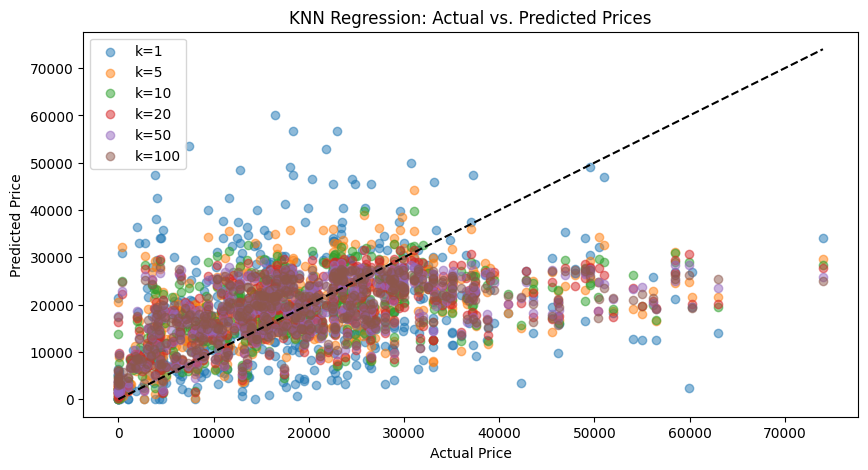

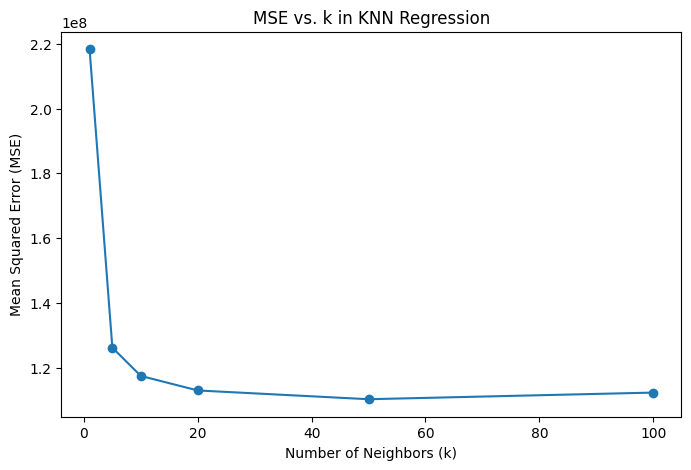

Optimal k: 50


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#1
file_path = "/content/USA_cars_datasets.csv"
df = pd.read_csv(file_path)

#2
df = df[['price', 'year', 'mileage']]

#3
print("Missing values:\n", df.isnull().sum())

#4
scaler = MinMaxScaler()
df[['year', 'mileage']] = scaler.fit_transform(df[['year', 'mileage']])

#5
X = df[['year', 'mileage']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#6
k_values = [1, 5, 10, 20, 50, 100]
errors = []

plt.figure(figsize=(10, 5))
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    errors.append(mse)

    # Scatter plot for predicted vs actual
    plt.scatter(y_test, y_pred, label=f'k={k}', alpha=0.5)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("KNN Regression: Actual vs. Predicted Prices")
plt.legend()
plt.show()

#7
plt.figure(figsize=(8, 5))
plt.plot(k_values, errors, marker='o', linestyle='-')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs. k in KNN Regression")
plt.show()

#8
optimal_k = k_values[np.argmin(errors)]
print(f"Optimal k: {optimal_k}")


Dataset Dimensions: (3798, 63)
Column Names: Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_fi

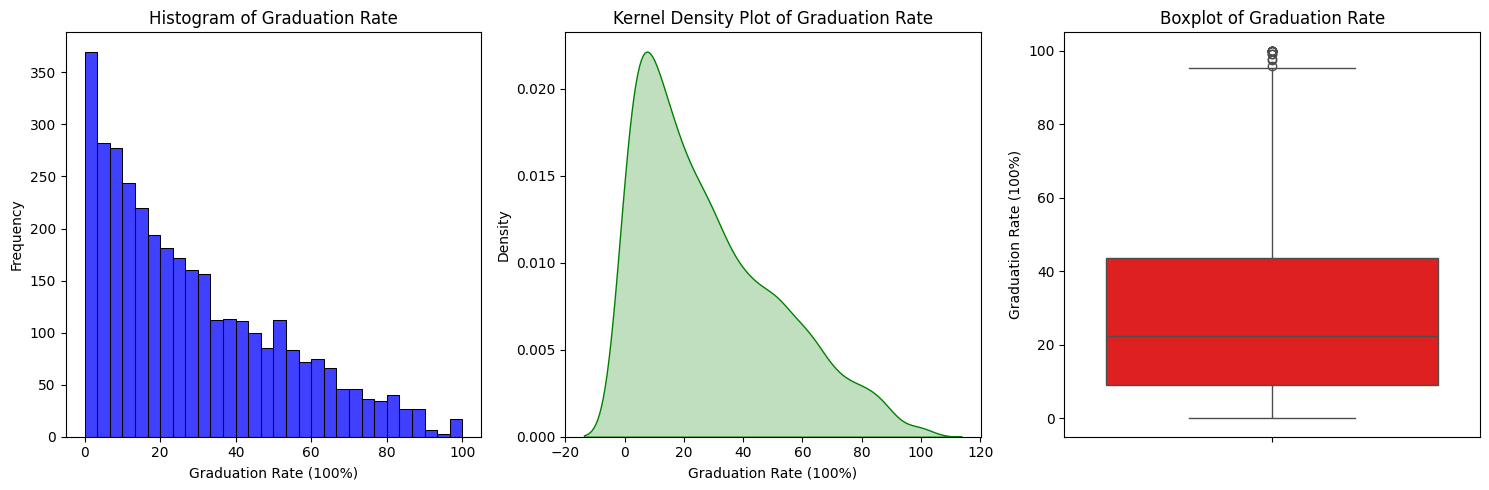

Statistical Description of Graduation Rate:
count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


In [5]:
import seaborn as sns


#1
file_path = "/content/college_completion.csv"
df = pd.read_csv(file_path)

#2
print("Dataset Dimensions:", df.shape)
print("Column Names:", df.columns)
print(df.head())

#3
cross_tab = pd.crosstab(df['control'], df['level'])
print("Cross Tabulation of Control and Level:")
print(cross_tab)

#4
df_clean = df[df['grad_100_value'].apply(lambda x: np.isfinite(x) and x <= 100)]

#5
plt.figure(figsize=(15, 5))

# Histogram of grad_100_value
plt.subplot(1, 3, 1)
sns.histplot(df_clean['grad_100_value'], bins=30, kde=False, color='blue')
plt.xlabel('Graduation Rate (100%)')
plt.ylabel('Frequency')
plt.title('Histogram of Graduation Rate')

# Kernel Density Plot
plt.subplot(1, 3, 2)
sns.kdeplot(df_clean['grad_100_value'].astype(float), fill=True, color='green')
plt.xlabel('Graduation Rate (100%)')
plt.title('Kernel Density Plot of Graduation Rate')

# Boxplot of grad_100_value
plt.subplot(1, 3, 3)
sns.boxplot(y=df_clean['grad_100_value'], color='red')
plt.ylabel('Graduation Rate (100%)')
plt.title('Boxplot of Graduation Rate')

# Show plots
plt.tight_layout()
plt.show()

#6
print("Statistical Description of Graduation Rate:")
print(df_clean['grad_100_value'].describe())
